# **GAME THEORY**

# **GAME 1: MJ, Lebron and The Prisoners Dillema**

Study of rational interaction within groups. Essentially, whenever you deal with another person, you’re playing a game.

**The Prisoners’ Dilemma:** The two players are Mike and LeBron. They were both abducted by Aliens then separated into different UFO's where they must confess on who is actually the GOAT . The aliens interrogating our players don’t have enough evidence, they need a confession. 

*Here are the strategies and payoffs for our players :*

If one player says himself while the other stays silent, the confessor receives GOAT status and 100,000 Alien currency while the other is abducted in space for 1500 Alien Years (230 Earth Years).

If both players abide by the code and stay silent, each player gets no GOAT status, the debates can go on and they both return to Earth after 1 Year.

If both players claim themselves, they each get abducted for 150 Alien years (23 Earth years).

**Staying silent is the "OG" strategy and Confessing the (Larry) "BIRD" strategy .** 


In [ ]:
#Load Necessary Packages
import numpy as np
import pandas as pd
import nashpy as nash
import quantecon as qe

In [ ]:
#pip install nashpy

In [ ]:
#pip install quantecon

**Create Mikes’s payoff matrix:**


In [ ]:
# create an array with Mike's payoffs
x = np.array([[-1, -230],[0, -23]])
# re-label the rows and columns
mike=pd.DataFrame(x, columns=['OG', 'BIRD'])
mike.index = ['OG', 'BIRD']
mike

,OG,BIRD
OG,-1,-230
BIRD,0,-23


Mike is represented by the rows while Randy is represented by the columns. For example, if Mike plays OG while LeBron plays BIRD, Mike’s payoff is -230 (the number of years he is abducted by Aliens). If Mike plays BIRD and LeBron plays OG, Mike's payoff is 0 (no years Abducted time).

**Create LeBron’s payoff matrix:** 


In [ ]:
# create LeBron's payoff matrix
# LeBron's payoff matrix is the transpose of Mike's
lebron=mike.T
lebron

,OG,BIRD
OG,-1,0
BIRD,-230,-23


**Alternative Way: **

In [ ]:
# Mike's payoffs (row player)
x = np.array([[-1, -230],[0, -23]]) 
# LeBron's payoffs (column player)
y = x.T
import nashpy as nash
prisoners_dilemma = nash.Game(x,y)
prisoners_dilemma

Bi matrix game with payoff matrices:

Row player:
[[  -1 -230]
 [   0  -23]]

Column player:
[[  -1    0]
 [-230  -23]]

**Payoff Table:** 

The payoff table is a bi-matrix which contains Mike's and LeBron’s payoff matrices written together.

In [ ]:
# create a list containing both players payoffs
po = [[(-1,-1), (-230,0)], [(0,-230), (-23,-23)]]
w = qe.game_theory.NormalFormGame(po)
print(w)

2-player NormalFormGame with payoff profile array:
[[[  -1,   -1],  [-230,    0]],
 [[   0, -230],  [ -23,  -23]]]


The strategy profiles for our game are: {(OG, OG), (OG, BIRD), (BIRD, OG), (BIRD, BIRD)}

Write a function to further crystalize our understanding:

In [ ]:
# write the payoff function
def payoff_function (x=str, y=str):
    if x == 'OG' and y == 'OG':
        print('Mike {}'.format(-1),':','LeBron {}'.format(-1))
    elif x == 'OG' and y == 'BIRD':
        print('Mike {}'.format(-230),':','LeBron {}'.format(0))
    elif x == 'BIRD' and y == 'BIRD':
        print('Mike {}'.format(-23),':','LeBron {}'.format(-23), ':', "NE")
    else:
        print('Mike {}'.format(0),':','LeBron {}'.format(-230))

Strategy Prolie: (BIRD, OG) = (0, -230). Function Output:

In [ ]:
payoff_function('BIRD', 'OG')

Mike 0 : LeBron -230


Initially neither player knows what the other player will do when deciding or making a choice. Hence NE is a pair of choices/strategies/expectations where neither player wants to change their behaviour even after the strategy/choice of the other player is revealed.


**Nash Equilibrium (NE):** optimal choice of Player A given Player B’s choice coincides with optimal choice of Player B given Player A’s choice. 

**Game is being played simultaneously:** 

Each player maximizes their payoffs by playing BIRD (it’s the only possible way either player can avoid getting being abducted). So, if our players are rational and look to maximize their preferences, they’ll always play hawk. In competitive terms, BIRD strictly dominates OG because all competitors want to win and be the best. Therefore, the outcome of our game will be (BIRD, BIRD). This represents the Nash equilibrium:

In [ ]:
payoff_function('BIRD', 'BIRD')

Mike -23 : LeBron -23 : NE


**They get 23 years each and lets forget that they wore 6 and 45**

# **GAME 2: Mixed Strategy Game**

Humans, often might make a choice and not stick to it . So, instead what the players can do is **randomize **their strategies.

In this game, if player B chooses left , then player A’s pay-offs are either 4 or 0. While, when player B chooses right, player A’s pay-offs are 0 or 2. Hence, if B chooses left A should choose Top and if B chooses Right then A should choose Bottom. This, optimal choice of A is dependent on what choice B makes.

In this game, strategy (Top, Left) is a Nash equilibrium because if A chooses Top, then the best thing for B is to choose Left because his pay-off for choosing left is 2 as opposed to 0 if he chooses bottom. Similarly if B chooses left then best choice for A is to choose Top, because he will get a higher pay-off of 4 if he chooses Top versus he will get 0 if he chooses Bottom.
So, can there be multiple Nash equilibrium? The answer is Yes. In this game we just discussed, in fact we have 2 Nash equilibria- the strategy (Bottom, Right) is also a NE because if A chooses Bottom, B should choose Right and vice versa.


**Multiple Nash equilibria:** There can be multiple Nash equilibria where there is no unique solution that exists.

No Nash Equilibira is also a possibility


In [ ]:
# Create the payoff matrix
A = np.array([[23,0],[0,6]]) # A is the row player
B = np.array([[6,0],[0,23]]) # B is the column player
game2 = nash.Game(A,B)
game2
# Find the Nash Equilibrium with Support Enumeration
equilibria = game2.support_enumeration()
for eq in equilibria:
    print(eq)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([0.79310345, 0.20689655]), array([0.20689655, 0.79310345]))


**Line 1:** “(array([1., 0.]), array([1., 0.])) “
Interpretation: This is the first Nash equilibrium (Top, Left).Player A chooses strategy 1 i.e. ‘Top’ as given by ‘1’ in the first position of the first array and Player B chooses strategy 1 i.e. ‘Left’ as given by ‘1’ in the first position of the second array.


**Line 2:** “(array([0., 1.]), array([0., 1.])) “
Interpretation: This is the second Nash equilibrium (Bottom, Right).Player A chooses strategy 2 i.e. ‘Bottom’ as given by ‘1’ in the second position of the first array and Player B chooses strategy 2 i.e. ‘Right’ as given by ‘1’ in the second position of the second array.


**`Mixed Strategy:`**

**Line 3:** “(array([0.66666667, 0.33333333]), array([0.33333333, 0.66666667])) “
Interpretation: Player A plays strategy 1 i.e. “Top” 66.67% of the times and strategy 2 i.e. “Bottom” 33.33% of the times while Player B plays strategy 1 i.e. “Left” 33.33% of the times and strategy 2 i.e. “Right” 66.67% of the times.
Logically also, Player A should assign higher probability to “Top” and player B to “Right” because these give them higher pay-offs.
This equilibrium is a mixed strategy Nash equilibrium and defined as
“Each player chooses the optimal “frequency” with which to play his strategies given the frequency choices of the other player”

*Calculate the utility /pay-offs of Player A and Player B in the mixed strategy game?*

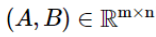

In [ ]:
# Calculate Utilities
sigma_r = np.array([.79,.21])
sigma_c = np.array([.21,.79])
pd = nash.Game(A, B)
pd[sigma_r, sigma_c]

array([4.8111, 4.8111])

**4.8 Years Abducted **